In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk


In [2]:
df=pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [3]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df=df.rename(columns={'Unnamed: 0':'Id'})

In [5]:
df.head()

,Id,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [6]:
example=df['Text'][52]
example

'@flcnhvy @AstroJordy Not that easy. This is two decades of intense work. Have to look at old notes, emails, texts.'

In [7]:
nltk.word_tokenize(example)

['@',
 'flcnhvy',
 '@',
 'AstroJordy',
 'Not',
 'that',
 'easy',
 '.',
 'This',
 'is',
 'two',
 'decades',
 'of',
 'intense',
 'work',
 '.',
 'Have',
 'to',
 'look',
 'at',
 'old',
 'notes',
 ',',
 'emails',
 ',',
 'texts',
 '.']

In [18]:
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [20]:
# Let's take a look at the updated text
df['Text'] = pd.DataFrame(df.Text.apply(cleaned1))
df.head(10)

,Id,Text
0,1,i’m an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,doge is underestimated
4,5,teslacn congratulations tesla china for amazin...
5,6,happy new year of the ox
6,7,frodo was the underdoge\nall thought he would ...
7,8,owensparks flcnhvy haha thanks
8,9,flcnhvy indeed tweets definitely do not repre...
9,10,the most entertaining outcome is the most likely


In [22]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [23]:
# Let's take a look at the updated text
df['Text'] = pd.DataFrame(df.Text.apply(cleaned2))
df.head(10)

,Id,Text
0,1,im an alien
1,2,idaacarmack ray tracing on cyberpunk with hdr ...
2,3,joerogan spotify great interview
3,4,doge is underestimated
4,5,teslacn congratulations tesla china for amazin...
5,6,happy new year of the ox
6,7,frodo was the underdogeall thought he would fa...
7,8,owensparks flcnhvy haha thanks
8,9,flcnhvy indeed tweets definitely do not repre...
9,10,the most entertaining outcome is the most likely


In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()

In [25]:
sia.polarity_scores(example)

{'neg': 0.111, 'neu': 0.829, 'pos': 0.06, 'compound': -0.2746}

In [26]:
##Run the polarity score through our dataset
from tqdm.notebook import tqdm

In [27]:
result={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['Text']
    my_id=row['Id']
    result[my_id]=sia.polarity_scores(text)

  0%|          | 0/1999 [00:00<?, ?it/s]

In [28]:
pd.DataFrame(result).T

,neg,neu,pos,compound
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,0.423,0.577,0.6249
4,0.512,0.488,0.000,-0.2732
5,0.000,0.661,0.339,0.8271
...,...,...,...,...
1995,0.241,0.575,0.184,-0.4215
1996,0.000,0.671,0.329,0.5994
1997,0.000,1.000,0.000,0.0000
1998,0.592,0.408,0.000,-0.7003


In [13]:
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [14]:
#Now We have sentiment score and our data 
vaders

,Id,neg,neu,pos,compound,Text
0,1,0.000,1.000,0.000,0.0000,@kunalb11 I’m an alien
1,2,0.000,1.000,0.000,0.0000,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,0.000,0.406,0.594,0.6588,@joerogan @Spotify Great interview!
3,4,0.412,0.588,0.000,-0.2732,@gtera27 Doge is underestimated
4,5,0.000,0.644,0.356,0.8513,@teslacn Congratulations Tesla China for amazi...
...,...,...,...,...,...,...
1994,1995,0.234,0.588,0.178,-0.4215,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,0.000,0.658,0.342,0.6360,@PPathole Make sure to read ur terms &amp; con...
1996,1997,0.000,1.000,0.000,0.0000,@TeslaGong @PPathole Samwise Gamgee
1997,1998,0.537,0.463,0.000,-0.7003,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [32]:
def get_tweet_sentiment(score): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    
    if score > 0: 
        return 'positive'
    elif score == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [34]:
df["score"] = df["Text"].apply(lambda review:sia.polarity_scores(review))
df.head()

,Id,Text,score
0,1,im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,3,joerogan spotify great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,4,doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,5,teslacn congratulations tesla china for amazin...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp..."


In [36]:
df["compound"] = df["score"].apply(lambda d:d["compound"])
df["sentiment"] = df["compound"].apply(lambda  score : get_tweet_sentiment(score))
        
del df["score"]
del df["compound"]

In [37]:
df.head()

,Id,Text,sentiment
0,1,im an alien,neutral
1,2,idaacarmack ray tracing on cyberpunk with hdr ...,neutral
2,3,joerogan spotify great interview,positive
3,4,doge is underestimated,negative
4,5,teslacn congratulations tesla china for amazin...,positive


E:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

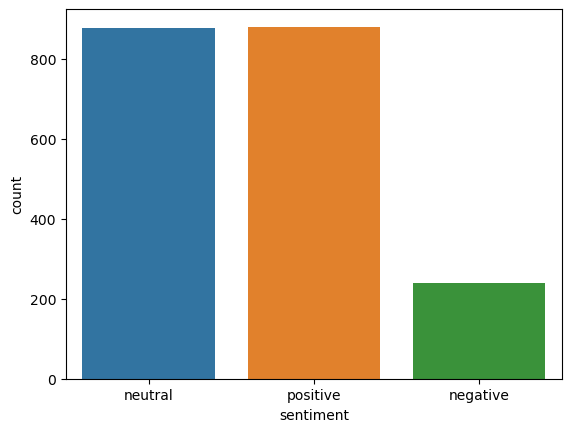

In [38]:
import seaborn as sns
sns.countplot(df['sentiment'])